Data Overview:
train data (train_dataset):

Dataset: 1500 entries, 10 columns

Columns:
Patient_ID:(not useful for prediction, can be ignored)
Age: Numerical
Marital_Status: Categorical (married/single)
Year of Operation: Numerical 
Positive_Axillary_Nodes: Numerical
Tumor_Size: Numerical (cm)
Radiation_Therapy: Categorical (Yes/No)
Chemotherapy: Categorical (Yes/No)
Hormone_Therapy: Categorical (Yes/No)
Survival_Status: Target variable (1 = Survived/0 = Not Survived)

0-No missing data,no need for imputation
1-Drop Patient_ID cause not useful
2-Encoding: convert categorical variables into numerical form: (Marital_Status, Radiation_Therapy, Chemotherapy, Hormone_Therapy) 
3-Scale numerical data( Age, Positive_Axillary_Nodes, and Tumor_Size)
4-LabelEncoder: convert categorical data into numerical form

Training set: 1,200 samples, 8 features.

Test data (test_dataset):
500 entries

Same structure as train_data, except it doesn't contain the Survival_Status column (cause we aim to predict it).

same no missing data

Categorical columns (Marital_Status, Radiation_Therapy, Chemotherapy, and Hormone_Therapy) encoded with LabelEncoder,to convert  categories into numerical values
Numerical columns (Age, Year of Operation, Positive_Axillary_Nodes, and Tumor_Size) standardized with StandardScaler,all features have mean 0 and standard deviation 1.

Test set: 300 samples, 8 features.

note :
X_train contains all features except Survival_Status and Patient_ID.
y_train contains only the Survival_Status.
X_test: Preprocessed test features (to make predictions)

fit_transform converts the training data to numbers/ transform converts the test data using the same mapping.
StandardScaler scales numeric data so that it has a mean of 0 and a standard deviation of 1.

unscalled data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer 
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

print("Columns in train_dataset:", train_dataset.columns.tolist())
print("Columns in test_dataset:", test_dataset.columns.tolist())

X_train = train_dataset.drop(columns=['Survival_Status', 'Patient_ID'])
y_train = train_dataset['Survival_Status']
#X_train = train_data.drop('Survival_Status', axis=1)
#y_train = train_data['Survival_Status']

X_test = test_dataset.drop(columns=['Patient_ID']) 
# Drop 'Patient_ID'
#X_test = test_data.drop(test_data.columns[1], axis=1)
categorical_columns = ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']
labelencoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = labelencoder.fit_transform(X_train[col])
    X_test[col] = labelencoder.transform(X_test[col])
    
    scaler = StandardScaler()

numerical_columns = ['Age', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size']
 
print("\nX_test:")
print(X_test.to_string(index=False))


print("\nX_train:")
print(X_train.to_string(index=False))

print("\ny_train:")
print(y_train.to_string(index=False))

Columns in train_dataset: ['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy', 'Survival_Status']
Columns in test_dataset: ['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']

X_train:
 Age  Marital_Status  Year of Operation  Positive_Axillary_Nodes  Tumor_Size  Radiation_Therapy  Chemotherapy  Hormone_Therapy
  77               0               1962                        5         3.0                  0             1                0
  36               0               1964                        2         1.9                  1             0                0
  47               0               1960                        5         2.0                  0             0                0
  54               0               1965                        0         1.4                  0 

scalled data

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

print("Columns in train_dataset:", train_dataset.columns.tolist())
print("Columns in test_dataset:", test_dataset.columns.tolist())


X_train = train_dataset.drop(columns=['Survival_Status', 'Patient_ID'])
y_train = train_dataset['Survival_Status']


X_test = test_dataset.drop(columns=['Patient_ID'])


categorical_columns = ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']
labelencoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = labelencoder.fit_transform(X_train[col])
    X_test[col] = labelencoder.transform(X_test[col])

scaler = StandardScaler()


X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


print("\nX_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


print("\nX_test:")
print(X_test.to_string(index=False))


print("\nX_train:")
print(X_train.to_string(index=False))

print("\ny_train:")
print(y_train.to_string(index=False))


Columns in train_dataset: ['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy', 'Survival_Status']
Columns in test_dataset: ['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']

X_train shape: (1500, 8)
X_val shape: (300, 8)
y_train shape: (1500,)
y_val shape: (300,)

X_test:
      Age  Marital_Status  Year of Operation  Positive_Axillary_Nodes  Tumor_Size  Radiation_Therapy  Chemotherapy  Hormone_Therapy
 0.330900               1           0.749868                -0.558080   -1.047030                  1             0                0
-1.548479               0          -1.024735                -0.558080    0.766271                  1             0                0
-0.317162               0          -0.137433                -0.267413   -0.518151                  1             0    

Training Dataset is the portion of data used to train ml model here i ll split it into: 80% Training Data & 20% validation Data 
TEST dataset won't be split because it's used to evaluate the final model's performance after training. It should not be altered or split during the training process to ensure the model's performance is assessed on completely unseen data btw i ll be using random forest classifier so i won't need to scalled data

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

print("Columns in train_dataset:", train_dataset.columns.tolist())
print("Columns in test_dataset:", test_dataset.columns.tolist())


X_train = train_dataset.drop(columns=['Survival_Status', 'Patient_ID'])
y_train = train_dataset['Survival_Status']


X_test = test_dataset.drop(columns=['Patient_ID'])

categorical_columns = ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']
labelencoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = labelencoder.fit_transform(X_train[col])
    X_test[col] = labelencoder.transform(X_test[col])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

print("\nX_test:")
print(X_test.to_string(index=False))

print("\nX_train:")
print(X_train.to_string(index=False))

print("\ny_train:")
print(y_train.to_string(index=False))


Columns in train_dataset: ['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy', 'Survival_Status']
Columns in test_dataset: ['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']

X_train shape: (1200, 8)
X_val shape: (300, 8)
y_train shape: (1200,)
y_val shape: (300,)

X_test:
 Age  Marital_Status  Year of Operation  Positive_Axillary_Nodes  Tumor_Size  Radiation_Therapy  Chemotherapy  Hormone_Therapy
  62               1               1966                        4         1.4                  1             0                0
  33               0               1960                        4         3.8                  1             0                0
  52               0               1963                        7         2.1                  1             0                0
  56  

accarancy test with random forest

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

features_train = train_data.drop(columns=['Survival_Status', 'Patient_ID'])
labels_train = train_data['Survival_Status']

features_test = test_data.drop(columns=['Patient_ID'])

categorical_features = ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']
label_encoder = LabelEncoder()

for feature in categorical_features:
    features_train[feature] = label_encoder.fit_transform(features_train[feature])
    features_test[feature] = label_encoder.transform(features_test[feature])

features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
features_train, labels_train = smote.fit_resample(features_train, labels_train)

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(features_train, labels_train)

best_rf_classifier = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

best_rf_classifier.fit(features_train, labels_train)

val_predictions = best_rf_classifier.predict(features_val)
accuracy = accuracy_score(labels_val, val_predictions)
print("Validation Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(labels_val, val_predictions))

test_predictions = best_rf_classifier.predict(features_test)
submission_df = pd.DataFrame({'Patient_ID': test_data['Patient_ID'], 'Survival_Status': test_predictions})
submission_df.to_csv('submission_rf.csv', index=False)

print("\nSubmission file created: submission_rf.csv")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5}
Validation Accuracy: 0.5333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       147
           1       0.54      0.52      0.53       153

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300


Submission file created: submission_rf.csv


with nneural network/tensorflow

Epoch 1/100


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5080 - loss: 0.8797 - val_accuracy: 0.5296 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5501 - loss: 0.7660 - val_accuracy: 0.4868 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5478 - loss: 0.7249 - val_accuracy: 0.5000 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5228 - loss: 0.7280 - val_accuracy: 0.5099 - val_loss: 0.6964 - learning_rate: 0.0010
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5102 - loss: 0.7229 - val_accuracy: 0.5132 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.7268 - val_accuracy: 0.5066 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5363 - loss: 0.7235 - val_accuracy: 0.51

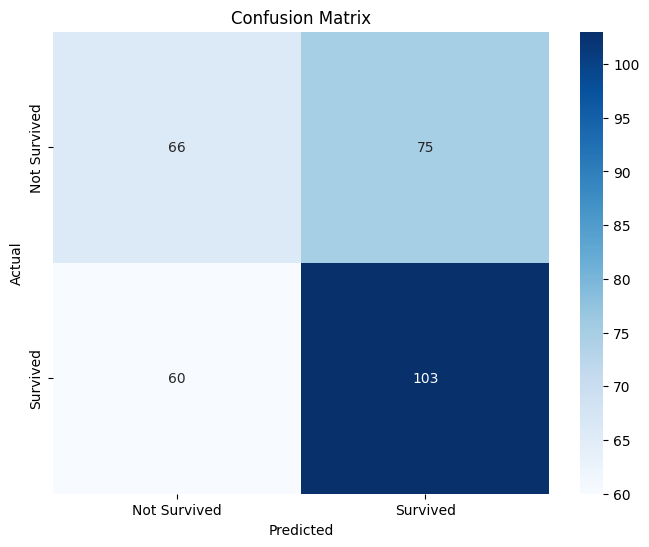

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Submission file created: submission_nn_optimized.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

X_train = train_dataset.drop(columns=['Survival_Status', 'Patient_ID'])
y_train = train_dataset['Survival_Status']
X_test = test_dataset.drop(columns=['Patient_ID'])

categorical_columns = ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']
labelencoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = labelencoder.fit_transform(X_train[col])
    X_test[col] = labelencoder.transform(X_test[col])


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Split into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# the neural network model
def create_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = create_model(X_train_split.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = model.fit(X_train_split, y_train_split, validation_data=(X_val, y_val), 
                    epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])


val_predictions = model.predict(X_val)
val_predictions_binary = (val_predictions > 0.5).astype(int)
accuracy = accuracy_score(y_val, val_predictions_binary)
print(f"Validation Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_val, val_predictions_binary))


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, val_predictions_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

test_predictions = model.predict(X_test)
test_predictions_binary = (test_predictions > 0.5).astype(int)


submission_df = pd.DataFrame({'Patient_ID': test_dataset['Patient_ID'], 'Survival_Status': test_predictions_binary.flatten()})
submission_df.to_csv('submission_nn_optimized.csv', index=False)
print("\nSubmission file created: submission_nn_optimized.csv")

code incorporates extensive feature engineering, hyperparameter tuning for RandomForestClassifie ; GradientBoostingClassifier, and XGBoost, and a VotingClassifier to combine the models

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

features_train = train_data.drop(columns=['Survival_Status', 'Patient_ID'])
labels_train = train_data['Survival_Status']
features_test = test_data.drop(columns=['Patient_ID'])

categorical_features = ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']
label_encoder = LabelEncoder()
for feature in categorical_features:
    features_train[feature] = label_encoder.fit_transform(features_train[feature])
    features_test[feature] = label_encoder.transform(features_test[feature])

features_train, features_val, labels_train, labels_val = train_test_split(
    features_train, labels_train, test_size=0.2, random_state=42
)

smote = SMOTE(random_state=42)
features_train, labels_train = smote.fit_resample(features_train, labels_train)

numeric_features = features_train.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
        ]), numeric_features)
    ],
    remainder='passthrough'
)

rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

def perform_random_search(estimator, param_grid, features, labels):
    random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_grid,
        n_iter=20,
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(features, labels)
    return random_search.best_estimator_

best_rf_classifier = perform_random_search(
    Pipeline([('preprocessor', preprocessor), ('classifier', rf_classifier)]), 
    {'classifier__' + key: value for key, value in rf_param_grid.items()},
    features_train, labels_train
)

best_gb_classifier = perform_random_search(
    Pipeline([('preprocessor', preprocessor), ('classifier', gb_classifier)]), 
    {'classifier__' + key: value for key, value in gb_param_grid.items()},
    features_train, labels_train
)

best_xgb_classifier = perform_random_search(
    Pipeline([('preprocessor', preprocessor), ('classifier', xgb_classifier)]), 
    {'classifier__' + key: value for key, value in xgb_param_grid.items()},
    features_train, labels_train
)

voting_classifier = VotingClassifier(
    estimators=[
        ('rf', best_rf_classifier),
        ('gb', best_gb_classifier),
        ('xgb', best_xgb_classifier)
    ],
    voting='soft'
)
voting_classifier.fit(features_train, labels_train)

val_predictions = voting_classifier.predict(features_val)
accuracy = accuracy_score(labels_val, val_predictions)
print("Validation Accuracy:", accuracy)
print(classification_report(labels_val, val_predictions))

test_predictions = voting_classifier.predict(features_test)
submission_df = pd.DataFrame({'Patient_ID': test_data['Patient_ID'], 'Survival_Status': test_predictions})
submission_df.to_csv('submission_voting_classifier.csv', index=False)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.5266666666666666
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       147
           1       0.54      0.54      0.54       153

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



# Survival Prediction Notebook
For a detailed explanation of each code section, refer to the [README.md](README.md) file included in this project.
